## Google Colab Stuff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/ThesisFinal")

## Generate Dataset

In [4]:
from custom_datasets import RLDataset, to_disk
from rl_env.agents import LeakyActor2
from rl_env.environment import RandomWalkEnv

dataset = RLDataset(agent=LeakyActor3(), env=RandomWalkEnv(), n_sequences=500, len_sequences=1000)
to_disk(dataset=dataset, path="data/leakyactor2")

Xs (shape=(500, 1000, 2) was saved to : <models/leakyactor3_xs.npy>.
Ys (shape=(500, 1000, 1) was saved to : <models/leakyactor3_ys.npy>.


## Training

In [2]:
#-- Define Dataset and Dataloader to train on--#
import jax
from models.disrnn_utils import create_disrnn_train_state, disrnn_trainstep
from models.gru_utils import create_gru_train_state
from models.rnn_utils import train_model
from torch.utils.data import DataLoader
from custom_datasets import custom_collate, from_disk

import absl.logging
absl.logging.set_verbosity('error')

# train_dataloader = DataLoader(from_disk("RLDataset", "data/leakyactor2"),
#                               batch_size=4,
#                               drop_last=True,
#                               collate_fn=custom_collate)


# #-- Creating training state, using a random key --#
# master_key = jax.random.PRNGKey(0)
# state = create_disrnn_train_state(master_rng_key=master_key,
#                                   learning_rate=0.001,
#                                   hidden_size=5,
#                                   batch_size=4,
#                                   seq_length=1000,
#                                   in_dim=2,
#                                   out_dim=2,
#                                   update_mlp_shape=[5, 5, 5],
#                                   choice_mlp_shape=[2, 2],
#                                   kl_loss_factor=0.01
#                                   )

# trained_model_state, training_metrics = train_model(state,
#                                                     train_dataloader,
#                                                     train_step_fun=disrnn_trainstep,
#                                                     num_epochs=100,
#                                                     print_every_other=1,)

## Analysis

[<Figure size 1600x550 with 4 Axes>, <Figure size 1600x550 with 4 Axes>]

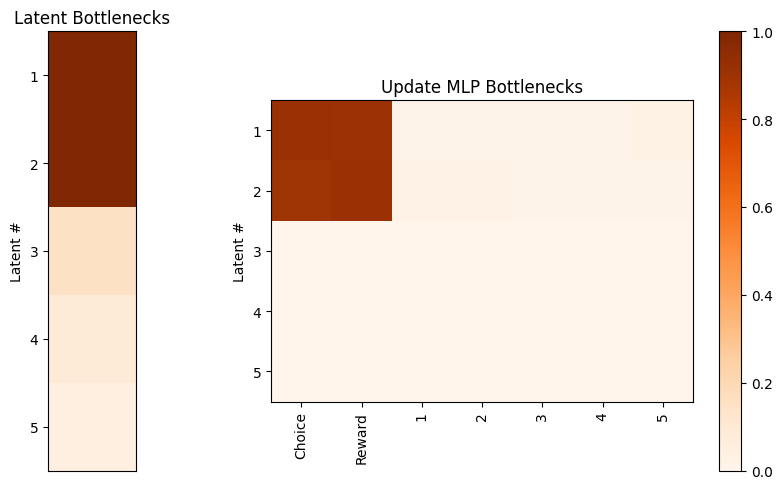

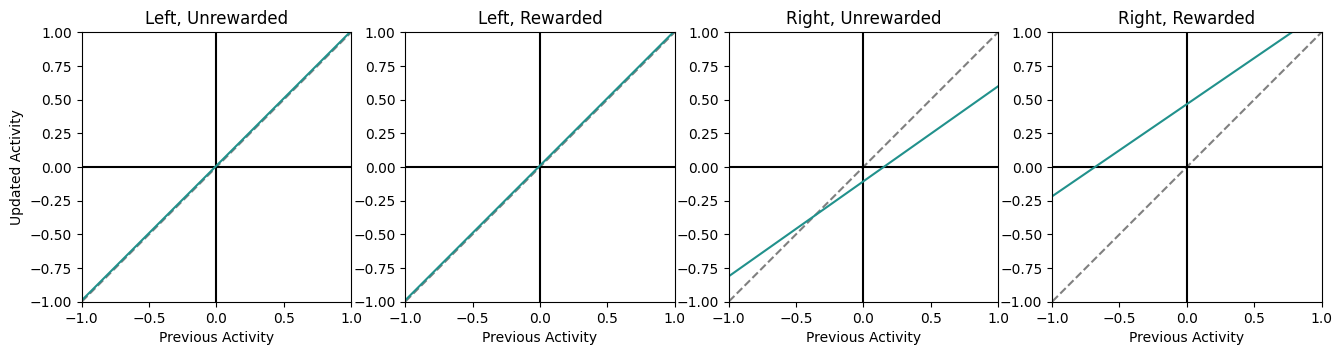

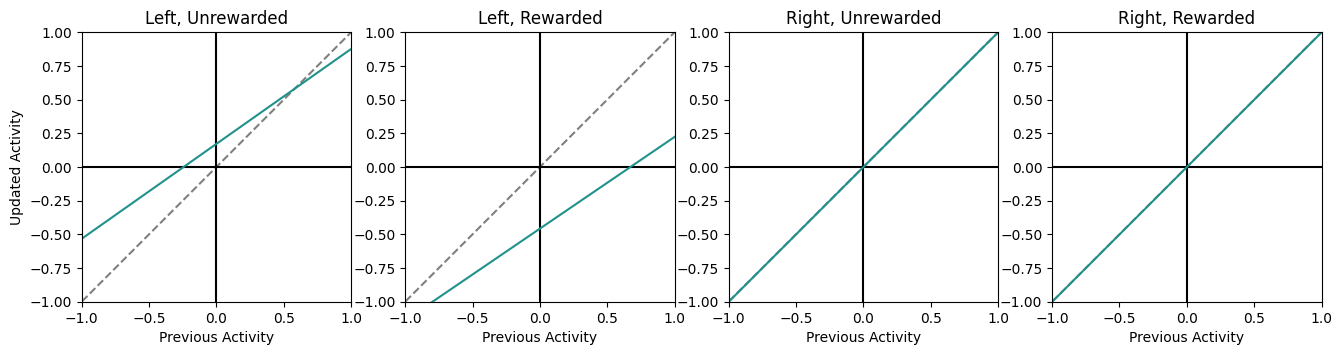

In [7]:
from models.disrnn_analysis import plot_bottlenecks, plot_bottleneck_evolution, plot_update_rules
from models.rnn_utils import load_model_state

# loading model/ creating model state
master_key = jax.random.PRNGKey(0)
state = create_disrnn_train_state(master_rng_key=master_key,
                                  learning_rate=0.001,
                                  hidden_size=5,
                                  batch_size=4,
                                  seq_length=1000,
                                  in_dim=2,
                                  out_dim=2,
                                  update_mlp_shape=[5, 5, 5],
                                  choice_mlp_shape=[2, 2],
                                  kl_loss_factor=0.01
                                  )
state = load_model_state("data/models/qagent_001_0005")

# plot final bottleneck values
final_bottlenecks = plot_bottlenecks(state["params"])

# plot bottleneck evolution
# bottleneck_evolution = plot_bottleneck_evolution("data/models/leakyactor_001_00075/")
# bottleneck_evolution = plot_bottleneck_evolution("data/models/qagent_001_001/")

# plot update rules
plot_update_rules(state["params"])